In [1]:
import pandas as pd
import seaborn as sns


In [3]:
!pwd

/storage/store/work/lgrinszt/TabPFN/tabpfn


In [2]:
results = pd.read_csv('results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'results.csv'

In [ ]:
results["model"].unique()

array(['Random Forest', 'Gradient Boosting', 'Logistic Regression',
       'TabPFN', 'TabPFNne', 'default35970_260', 'trees13368_60',
       'trees456_390', 'trees66554_75', 'mlp60400_160', 'mlp71353_400',
       'trees13368_60_no_prepro', 'trees456_390_no_prepro',
       'trees13368_60_no_prepro2', 'trees456_390_no_prepro2',
       'TabPFNno_prepro', 'default35702_250_no_prepro2',
       'trees79428_250_no_prepro2', 'default35702_250', 'trees79428_250',
       'trees13368_15'], dtype=object)

In [36]:
results = pd.read_csv('tabpfn/results_benchmark.csv')
results = results[results["metric"] == "accuracy"]
results["accuracy"] = results["value"]
results = results[results["suite_id"] == "334"]
# results_large["suite_id"] = "337"
# results_large["model"] = results_large["model"] + "_large"
# # replce model "checkpoint" by trees
# results = pd.concat([results, results_large])
# results = results[results["suite_id"] == "337"]

In [16]:
results

,Unnamed: 0.10,Unnamed: 0.9,Unnamed: 0.8,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,suite_id,task_id,seed,metric,value,model,accuracy
132,132,132.0,132.0,132.0,132.0,132.0,132.0,132.0,132.0,132.0,0.0,cc18,11,0,accuracy,0.407643,tabpfn_trees13368_60,0.407643
134,134,134.0,134.0,134.0,134.0,134.0,134.0,134.0,134.0,134.0,0.0,cc18,11,1,accuracy,0.407643,tabpfn_trees13368_60,0.407643
136,136,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,136.0,0.0,cc18,11,2,accuracy,0.464968,tabpfn_trees13368_60,0.464968
138,138,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,138.0,0.0,cc18,14,0,accuracy,0.075820,tabpfn_trees13368_60,0.075820
140,140,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,140.0,0.0,cc18,14,1,accuracy,0.102459,tabpfn_trees13368_60,0.102459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cc18,40994,1,accuracy,0.970370,trees69859_eouc70o7_390,0.970370
2536,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cc18,40994,2,accuracy,0.970370,trees69859_eouc70o7_390,0.970370
2538,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cc18,40975,0,accuracy,0.960227,trees69859_eouc70o7_390,0.960227
2540,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cc18,40975,1,accuracy,0.971591,trees69859_eouc70o7_390,0.971591


In [ ]:
pivoted = results.pivot(index=None, columns='metric', values='value')

In [ ]:
results

In [ ]:
pivoted.fillna(method='ffill').columns

In [ ]:
pivoted.fillna(method='ffill').drop_duplicates(subset=["accuracy", "roc_auc"])

In [ ]:
results_337 = results[results["suite_id"] == "337"]
results_334 = results[results["suite_id"] == "334"]
results_cc18 = results[results["suite_id"] == "cc18"]

In [ ]:
results_337.head()

In [ ]:
results[results["model"].isin(["tabpfn_trees13368_60", "tabpfn", "gbt"])]

In [10]:
results["model"].unique()

array(['tabpfn_trees13368_60', 'tabpfn', 'gbt', 'checkpoint'],
      dtype=object)

<Axes: xlabel='task_id', ylabel='accuracy'>

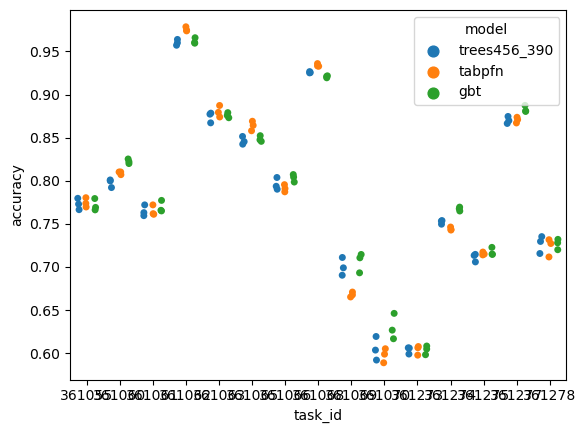

In [51]:
#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results[results["model"].isin(["tabpfn", "tabpfn_large", "gbt", "gbt_large", "checkpoint", "trees456_390_large", "trees456_390"])],
              dodge=True)

In [33]:
results["task_id"].unique()

array(['361055', '361060', '361061', '361062', '361063', '361065',
       '361066', '361068', '361069', '361070', '361273', '361274',
       '361275', '361277', '361278'], dtype=object)

<Axes: xlabel='task_id', ylabel='accuracy'>

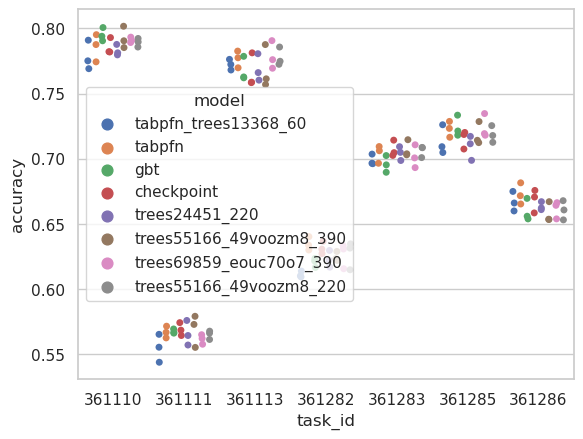

In [37]:
# plot the results
# score in y
# task_id in x
# hue is the model

sns.set(style="whitegrid")
# accuracy

#ax = sns.boxplot(x="task_id", y="value", hue="model", data=results_337[results_337["metric"] == "accuracy"], palette="Set3")
# replace by scatterplot
results["task_id"] = results["task_id"].astype(str)
sns.stripplot(x="task_id", y="accuracy", hue="model", 
              data=results,#[results["model"].isin(["trees13368_60_no_prepro2", "TabPFN", "Gradient Boosting"])],
              dodge=True)

In [38]:
# Compute mean rank of each model
#results = results_337[results_337["metric"] == "accuracy"]
# group by model and task_id, and compute the mean accuracy
mean_acc = results.groupby(['model', 'task_id']).mean()


# sort the resulting dataframe by model and accuracy
sorted_acc = mean_acc.sort_values(['model', 'value'], ascending=[True, False])

# assign ranks to each model based on sorted order of accuracy
sorted_acc['rank'] = sorted_acc.groupby('task_id')['value'].rank(method='dense', ascending=False)


# compute the mean rank for each model
mean_rank = sorted_acc.groupby('model')['rank'].mean()

mean_rank

/tmp/ipykernel_35846/2435248561.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_acc = results.groupby(['model', 'task_id']).mean()


model
checkpoint                 3.857143
gbt                        4.857143
tabpfn                     3.142857
tabpfn_trees13368_60       6.428571
trees24451_220             5.571429
trees55166_49voozm8_220    4.000000
trees55166_49voozm8_390    4.142857
trees69859_eouc70o7_390    4.000000
Name: rank, dtype: float64

In [39]:
import pandas as pd

# compute the maximum and minimum accuracy for each task
task_acc_range = results.groupby('task_id')['accuracy'].agg(['max', 'min'])

# merge the maximum and minimum accuracy with the original dataframe
merged_df = pd.merge(results, task_acc_range, on='task_id')

# compute the range of accuracy for each task
merged_df['range'] = merged_df['max'] - merged_df['min']

# compute the normalized accuracy for each task
merged_df['normalized_accuracy'] = (merged_df['accuracy'] - merged_df['min']) / merged_df['range']

# compute the mean normalized accuracy for each model
mean_normalized_acc = merged_df.groupby('model')['normalized_accuracy'].mean()

print(mean_normalized_acc)


model
checkpoint                 0.558848
gbt                        0.477558
tabpfn                     0.643820
tabpfn_trees13368_60       0.338338
trees24451_220             0.440102
trees55166_49voozm8_220    0.553676
trees55166_49voozm8_390    0.528026
trees69859_eouc70o7_390    0.550588
Name: normalized_accuracy, dtype: float64


In [1]:
from tabpfn import TabPFNClassifier

In [2]:
TabPFNClassifier()

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cpu device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7fb56113aee0>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'norm

TabPFNClassifier()

In [4]:
config = TabPFNClassifier().c

Using style prior: True
{'recompute_attn': True}
<module 'wandb' from '/home/soda/lgrinszt/.local/miniconda3/envs/tab_pfn2/lib/python3.9/site-packages/wandb/__init__.py'>
Using cpu device
Batch size: 1
DataLoader.__dict__ {'num_features': 100, 'num_steps': 8192, 'batch_size': 1, 'eval_pos_seq_len_sampler': <function create_model.<locals>.eval_pos_seq_len_sampler at 0x7fe4b1a401f0>, 'seq_len_maximum': 10, 'device': 'cpu', 'get_batch_kwargs': {'hyperparameters': {'lr': 0.0001, 'dropout': 0.0, 'emsize': 512, 'batch_size': 1, 'nlayers': 12, 'num_features': 100, 'nhead': 4, 'nhid_factor': 2, 'bptt': 10, 'eval_positions': [972], 'seq_len_used': 50, 'sampling': 'mixed', 'epochs': 400, 'num_steps': 8192, 'verbose': False, 'mix_activations': True, 'nan_prob_unknown_reason_reason_prior': 1.0, 'categorical_feature_p': 0.2, 'nan_prob_no_reason': 0.0, 'nan_prob_unknown_reason': 0.0, 'nan_prob_a_reason': 0.0, 'max_num_classes': 10, 'num_classes': 2, 'noise_type': 'Gaussian', 'balanced': False, 'norm

In [6]:
config["num_steps"]

8192

In [11]:
config["epochs"]

400

In [12]:
for key in config:
    if "aggregate" in key:
        print(key, config[key])

aggregate_k_gradients 8
